## Understanding Uncertainty in Model Forecasts of Tropical Cyclones


Authors:
* Lara Tobias-Tarsh (laratt@umich.edu)
* Nick Dewhirst
* Ryan Pohlman
* Claire Sheeren

In [5]:
# perform imports
import numpy as np
import sys

# ensure that the path is always set to the correct location for the track error module
sys.path.insert(0, '/Users/laratobias-tarsh/Documents/clim323-final/errorCalcModules/')

import track_error as te # the name you use to import this is arbitrary, I just used te bc it is an easy shorthand
from pprint import pprint
import os

## Motivation
Tropical Cyclones are some of the largest and most destructive natural phenomena to occur on the planet. These warm core storms form in the tropics (30-0 degrees N & S), driven by the relatively warm sea surface temperatures adn more dominant vertical motions in dynamics. (expand)

### Numerical Weather Prediction (NWP)

### Project Goals



### Data
#### TC Best Tracks
Best Track data is gathered from the NHC HurDat2 database (Landsea et. al, 200x), which conatins storm tracks for all Atlantic Basin TCs from 1951 to present, and is updated at the end of each season. Data is stored in a .txt file, contaning all necessary data for calculating model errors. Because the dataset is very large and some datapoints are encoded, we use the hurdat2parser.py library to save time writing a custom parser. The data quality is good, with no missing values in the data for the 2020 Atlantic Hurricane Season. Because the 2020 season was so active that greek letter storm names had to be used alongside the regular alphabetical namelist, we did encounter a limitation of this library, as it uses only the first letter of the storm name to extract data for a given storm. This was resolved by encoding the unique storm identifier codes into our parser function. 

#### Model Forecasts

### DATA CLASSES

#### Reading in data
Data for this study was stored in custom data classes, allowing us to perform calculations efficiently on as many storms as we wanted without requiring us to repeat various lines of code or define vast amount of functions in the main notebook that would clutter our analysis. This allows us to initialise all necessary data for a TC from just the filepath to a folder containing the csv files for the track. Given that some longer lived TCs have a large number of TIGGE track data files, this approach streamlines reading in data to a simple class constructor.

For example, here we load the data for TC Laura. We call the initialiser function from the trackError module, and pass it the filepath to the TIGGE data. This function iterates through each file in the directory and calls another function which is built to extract and parse data for a specific storm. Documentation for these helper functions can be accessed either on the github at https://github.com/larantt/hurricane-verification or by calling the help() function on any of the helper functions:

In [6]:
help(te.generate_cyclone)

Help on function generate_cyclone in module track_error:

generate_cyclone(dirpath)
    Function initialises a cyclone object from a list of csvs
    
    Iterates through a list of csv files in a directory and constructs a
    cyclone object. Generates variables by parsing the name of the file.
    Requires following modified TropCy naming conventions. 
    Each TC's csv files should be contained in its own directory:
    e.g. ~/cyclones/Isaac-2006/
    
    Parameters
    ----------
        dirpath : str
            path to directory containing cyclone csvs
    
    Returns
    -------
         : Cyclone
            Cyclone object for storm in directory



As we can see from the docstring, this function will return the data as a 'Cyclone object.' This is the 'superclass' that contains all of the data for a given storm, although it is built on a number of other classes that help maintain format standardisation between different models and best track databases should the study be expanded. It also reduces the chance of returning incorrect files or reading data into the wrong place as all statistics are read in or collected using 'post init' member functions.

In [7]:
help(te.Cyclone)

Help on class Cyclone in module track_error:

class Cyclone(builtins.object)
 |  Cyclone(name: str, year: int, ecmwf: track_error.Model, best_track: track_error.Track) -> None
 |  
 |  Main TC object containing all information wrt a TC
 |  
 |  Class contains all information that is used in tracking TCs for
 |  organisational purposes, as well as key TC information that can
 |  be used as a metric for comparison.
 |  
 |  Attributes
 |  ----------
 |      name : str 
 |          NHC assigned storm name
 |      year : int
 |          Year of storm occurrence
 |      ecmwf : Model 
 |          ECMWF model object
 |      gfs : Model 
 |          GFS model object
 |      number : int 
 |          Number of storm in season
 |      formation_date : dt.datetime
 |          Date of formation in best track
 |      best_track : List
 |          List containing best track data
 |  
 |  Methods defined here:
 |  
 |  __eq__(self, other)
 |      Return self==value.
 |  
 |  __init__(self, name: str

Here we will initialise Cyclone objects for our case study storms - Cristobal, Laura and Delta:

In [8]:
# Specify path to directory containing subdirectories with TCs:
dirpath = '/Users/laratobias-tarsh/Documents/clim323-final/tcTracksCleaned/'

# Create a list of storms to be analysed
# note - this approach will be conditional on directory structure as you are creating a filepath
storms = ['Cristobal','Laura','Delta']

# Create an empty list to store each cyclone object 
# (I prefer this to a dictionary for a small number of storms, but may be less appropriate for a whole season where individual storms are needed)
storm_list = []

# Loop over file paths and initialise each storm:
for storm in storms:
    storm_list.append(te.generate_cyclone(dirpath+storm))

Cristobal = storm_list[0]
Laura = storm_list[1]
Delta = storm_list[2]

reading file: Cristobal-2020-06-03-00.csv
reading file: Cristobal-2020-06-03-12.csv
reading file: Cristobal-2020-06-04-00.csv
reading file: Cristobal-2020-06-04-12.csv
reading file: Cristobal-2020-06-05-00.csv
reading file: Cristobal-2020-06-05-12.csv
reading file: Cristobal-2020-06-06-00.csv
reading file: Cristobal-2020-06-06-12.csv
reading file: Cristobal-2020-06-07-00.csv
reading file: Cristobal-2020-06-07-12.csv
reading file: Cristobal-2020-06-08-00.csv
reading file: Cristobal-2020-06-08-12.csv
reading file: Cristobal-2020-06-09-00.csv
reading file: Cristobal-2020-06-09-12.csv
reading file: Cristobal-2020-06-10-00.csv
reading file: Cristobal-2020-06-10-12.csv
reading file: Laura-2020-08-22-00.csv
reading file: Laura-2020-08-22-12.csv
reading file: Laura-2020-08-23-00.csv
reading file: Laura-2020-08-23-12.csv
reading file: Laura-2020-08-24-00.csv
reading file: Laura-2020-08-24-12.csv
reading file: Laura-2020-08-25-00.csv
reading file: Laura-2020-08-25-12.csv
reading file: Laura-2020

In [9]:
Cristobal


        Cyclone(
            Name: Cristobal
            Year: 2020
            Formation Date: 2020-06-01
            Dissipation Date: 2020-06-12
            EPS Runs: 16 runs initialised:
                        Forecast(time=Timestamp('2020-06-03 00:00:00'), lat=18.9, lon=-92.3, mslp=1000, vmax=32, track_error=23.791989907819147, intensity_error=4)
                        ...
                        Forecast(time=Timestamp('2020-06-11 12:00:00'), lat=53.4, lon=-79.8, mslp=985, vmax=35, track_error=45.654218883909714, intensity_error=-2)
            Best Track: 
                        Position(time=datetime.datetime(2020, 6, 1, 18, 0), lat=19.4, lon=-90.9, mslp=1006, vmax=25)
                        ...
                        Position(time=datetime.datetime(2020, 6, 12, 6, 0), lat=52.5, lon=-79.1, mslp=998, vmax=35)
        )

Here we can see Cristobal's Cyclone object. This contains some basic statistics for the the overall storm, as well as subclasses for the TC's EPS runs and best track data. There are also various methods included in the class for generating maps of the TC's track. This provides the user with a visual reference for the statistical plots generated later in this notebook. Future iterations of the track_error module will likely implement these as class methods in order to maintain an object oriented style throughout.

For example:

In [10]:
# Print a quick summary of TC Cristobal:
Cristobal.print_summary()

Tropical Cyclone Cristobal:
formation date: 2020-06-01, 18:00
dissipation date: 2020-06-12, 06:00
Best Track: [(-90.9, 19.4), (-91.6, 19.6), (-92.1, 19.6), (-92.5, 19.5), (-92.6, 19.2), (-92.5, 19.0), (-92.3, 18.9), (-92.2, 18.8), (-92.1, 18.7), (-91.9, 18.5), (-91.7, 18.2), (-91.5, 17.9), (-91.2, 17.7), (-90.8, 17.6), (-90.4, 17.9), (-90.1, 18.6), (-89.9, 19.6), (-89.9, 20.8), (-90.0, 22.0), (-90.1, 23.0), (-90.2, 23.9), (-90.2, 24.8), (-90.1, 25.8), (-90.0, 26.9), (-89.9, 28.0), (-89.8, 29.0), (-89.8, 29.3), (-89.9, 29.8), (-90.6, 30.6), (-91.5, 31.7), (-92.0, 32.9), (-92.1, 34.2), (-92.2, 35.8), (-92.1, 38.0), (-91.7, 40.3), (-90.8, 42.6), (-89.3, 45.0), (-87.4, 47.5), (-85.1, 49.8), (-82.6, 51.7), (-81.2, 52.7), (-80.4, 53.2), (-79.8, 53.4), (-79.4, 53.3), (-79.1, 52.5)]
ECMWF Mean Total Track Error: 103.3260505822758
ECMWF Mean Total Intensity Error: 1.3234592054365073


In [11]:
# Display a preview of the source code for the forecast evolution
te.Cyclone.track_map_fcast_evolution??

Signature: te.Cyclone.track_map_fcast_evolution(self)
Source:   
    def track_map_fcast_evolution(self):
        """ Creates a map showing the track forecast evolution across
            model runs """
        fig = plt.figure(figsize=(10,8))
        ax = plt.axes(projection=ccrs.PlateCarree())
        min_lon = min(self.ecmwf.runs[0].return_lons())
        max_lon = max(self.ecmwf.runs[0].return_lons())
        min_lat = min(self.ecmwf.runs[0].return_lats())
        max_lat = max(self.ecmwf.runs[0].return_lats())
        
        for (idx,run) in enumerate(self.ecmwf.runs):
            lons = run.return_lons()
            lats = run.return_lats()
            init = min(run.return_times())

            if min(lons) < min_lon : min_lon = min(lons)
            if max(lons) < max_lon : max_lon = max(lons)
            if min(lats) < min_lat : min_lon = min(lats)
            if max(lats) < max_lat : min_lat = min(lats)

            ax.scatter(lons,lats,transform=ccrs.PlateCarree(), 
      

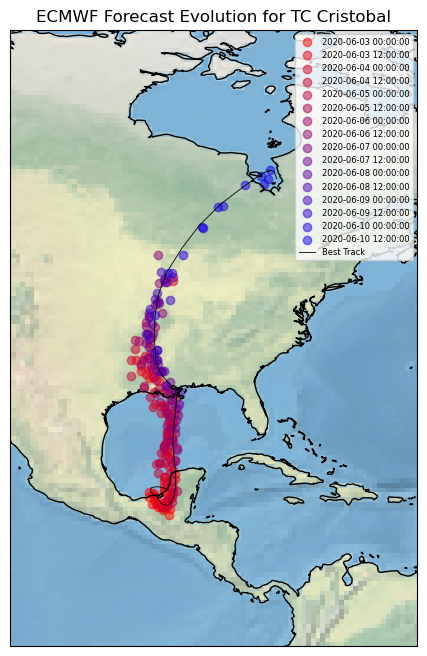

In [12]:
# Generate a forecast evolution map of all EPS runs for TC Cristobal
Cristobal.track_map_fcast_evolution()

In [13]:
# Display source code and documentation for error maps for TC Cristobal
te.Cyclone.track_map_fcast_evolution_errors??

Signature: te.Cyclone.track_map_fcast_evolution_errors(self)
Source:   
    def track_map_fcast_evolution_errors(self):
        """ Creates a map showing the track forecast evolution across
            model runs """
        fig = plt.figure(figsize=(20,10))
        ax1 = fig.add_subplot(211,projection=ccrs.PlateCarree())
        ax2 = fig.add_subplot(221,projection=ccrs.PlateCarree())
        min_lon = min(self.ecmwf.runs[0].return_lons())
        max_lon = max(self.ecmwf.runs[0].return_lons())
        min_lat = min(self.ecmwf.runs[0].return_lats())
        max_lat = max(self.ecmwf.runs[0].return_lats())
        
        for (idx,run) in enumerate(self.ecmwf.runs):
            lons = run.return_lons()
            lats = run.return_lats()
            init = min(run.return_times())

            if min(lons) < min_lon : min_lon = min(lons)
            if max(lons) < max_lon : max_lon = max(lons)
            if min(lats) < min_lat : min_lon = min(lats)
            if max(lats) < max_lat :

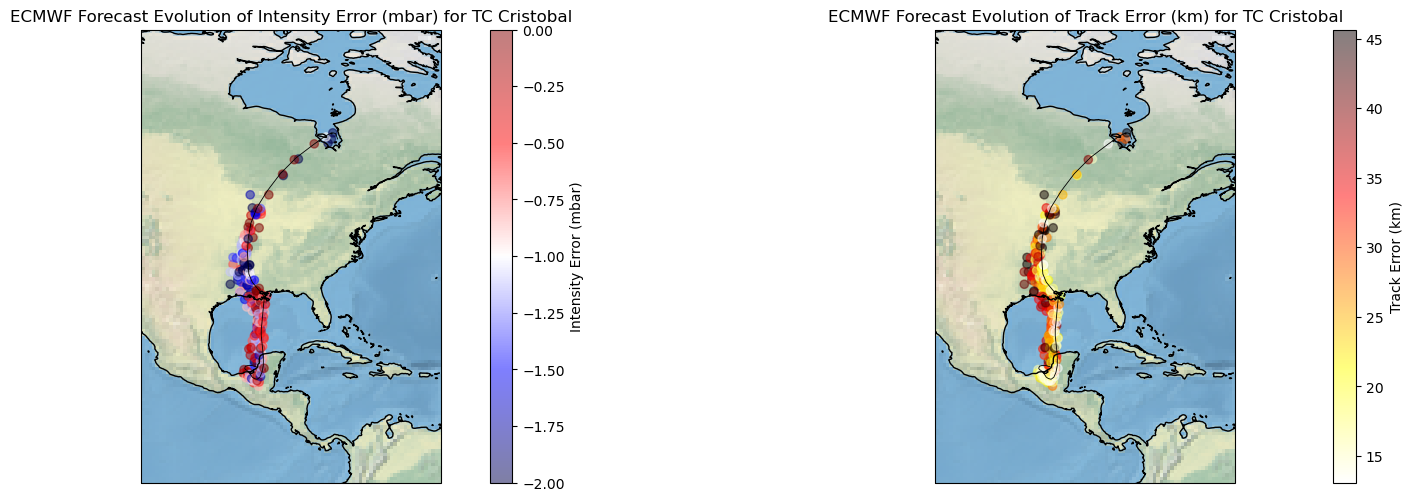

In [14]:
# Show error metric maps for TC Cristobal
Cristobal.track_map_fcast_evolution_errors()

While these maps do not provide an indication of statistical significance, they are helpful for identifying initial trends and verifying analytical results. For example, we can quickly determine that Cristobal was very well forecast, with very small intensity and track error throughout. We also see much more variability in the tropics than in the midlatitudes in both the track and intensity errors, which we discuss further later. 

Returning to dataclasss structure, both the Best Track and the EPS runs that each Cyclone contains is just a list of Forecasts or Positions. A Position is the base class of the hierarchy, and contains all the necessary data to perform analysis on a TC, as well as some member functions that allow us to calculate error metrics as the storm is initialised, saving time and cleaning up the analysis process. A Forecast object inherits the base class attributes, but also stores track and intensity error data for each timestep. This data is calculated using the trackError() and intensityError() methods.

Given that every object is a combination of lists and tuples, it is possible to dot index into the dataframe to extract the desired data.

For reference, the documentation and source code for these is included below:

In [15]:
help(te.Position)

Help on class Position in module track_error:

class Position(builtins.object)
 |  Position(time: datetime.datetime, lat: float, lon: float, mslp: float, vmax: float) -> None
 |  
 |  TC object containing positional and intensity information
 |  
 |  Base class containing all positional and intensity information for a given forecast hour.
 |  Valid for best tracks and forecast objects.
 |  
 |  Attributes
 |  -----------
 |      time : dt.datetime
 |          UTC time associated with forecast member.
 |      lat : float
 |          Latitude of TC centre
 |      lon : float
 |          Longitude of TC centre
 |      mslp : float
 |          Mean Sea Level Pressure at TC centre
 |      vmax : float
 |          Maximum sustained windspeed
 |  
 |  Methods defined here:
 |  
 |  __eq__(self, other)
 |      Return self==value.
 |  
 |  __init__(self, time: datetime.datetime, lat: float, lon: float, mslp: float, vmax: float) -> None
 |      Initialize self.  See help(type(self)) for accurate

In [16]:
# show source code for intensity error function
te.Position.intensityError??

Signature: te.Position.intensityError(self, other)
Source:   
    def intensityError(self, other):
        """Calculates intensity difference between two TCs

        Calculates the difference in intensity between the mean sea level pressure (MSLP) 
        at one TC centre and another TC centre.
        Generally used for calculating the intensity error between a modelled TC
        and the TC best track but can be useful for analysing other parameters when
        TC interaction is an important factor therefore is included as an attr.

        Parameters
        ----------
        self : Position
            Existing position object containing central MSLP in mbar
        other : Position
            Position object containing central MSLP in mbar

        Returns
        -------
         : float
            difference in central MSLP between the two systems
        
        """
        #real_mslp = [entry for (index,entry) in enumerate(other) if other[index].time == self.time][0]
  

In [17]:
# show source code for track error function
te.Position.trackError??

Signature: te.Position.trackError(self, other)
Source:   
    def trackError(self,other):
        """ Calculates a TC track error between one storm and another
        
        Performs a time based indexing scheme then calculates great circle distance
        between two tracks. 

        Parameters
        ----------
        self : Position
            Existing Position object containing latitude and longitude information
        other : Position
            Position object containing latitude and longitude information

        Returns
        --------
         : float
            Track error distance between two Position objects
        """
        # check start time of position object
        #real_position = [entry for (index,entry) in enumerate(other) if other[index].time == self.time][0]
        return self.great_circle(other)
File:      ~/Documents/clim323-final/errorCalcModules/track_error.py
Type:      function

The class that contains the majority of data useful in analysis is the Track class. This is essentially a time series of Positions or Forecasts stored in a list. Each track can be considered equivalent to one run of the model, thus each Track for a storm is stored in the Run object. Because the module was constructed with the intention of comparing multiple ensemble members of multiple models, the Model class is somewhat redundant in this analysis, however for completeness and future development following the class, this was kept in.


Here we examine the initial EPS forecast for Cristobal:

In [18]:
# Index in to Cristobal cyclone object and store the initial EPS forecast
run1 = Cristobal.ecmwf.runs[0]

# Pretty print the forecast positions in this object
pprint(run1)

Track(forecasts=[Forecast(time=Timestamp('2020-06-03 00:00:00'),
                          lat=18.9,
                          lon=-92.3,
                          mslp=1000,
                          vmax=32,
                          track_error=23.791989907819147,
                          intensity_error=4),
                 Forecast(time=Timestamp('2020-06-09 00:00:00'),
                          lat=32.1,
                          lon=-92.7,
                          mslp=997,
                          vmax=25,
                          track_error=240.09571266696568,
                          intensity_error=3),
                 Forecast(time=Timestamp('2020-06-08 18:00:00'),
                          lat=31.2,
                          lon=-92.7,
                          mslp=998,
                          vmax=36,
                          track_error=200.21136768278873,
                          intensity_error=4),
                 Forecast(time=Timestamp('2020-06-08 00:00:0

Note that these are not in chronological order, which we address later in the code when performing analysis. However, we can see the structure of the Track object clearly. We also calculate the mean track and intensity error for each run and store these in the Track object.

The Track object also has useful functionality for analysis, allowing for the track error, intensity error, times and coordinates to be returned as lists that can be plotted and analysed easily. All of these are constructed using the same simple list comprehension structure, thus only source code for one of these functions is included here. All code is included in the module on GitHub. 

Here we print the coordinates and track error for the initial run of Cristobal:

In [19]:
te.Track.return_coords??

Signature: te.Track.return_coords(self)
Source:   
    def return_coords(self):
        """ Gives a list of (lat,lon) pairs for a given track
        
        Parameters
        -----------
        self : Track
            track object containing positional and temporal TC data

        Returns
        --------
            : List
            List of tuples containing coordinates of TC position for easy mapping
        """
        return [(self.forecasts[idx].lon,self.forecasts[idx].lat) for (idx,fcst) in enumerate(self.forecasts)]
File:      ~/Documents/clim323-final/errorCalcModules/track_error.py
Type:      function

In [20]:
run1.return_coords()

[(-92.3, 18.9),
 (-92.7, 32.1),
 (-92.7, 31.2),
 (-91.1, 28.3),
 (-91.7, 30.9),
 (-90.2, 26.5),
 (-92.7, 19.0),
 (-92.8, 18.5),
 (-92.4, 17.8),
 (-91.8, 17.5),
 (-91.3, 17.1),
 (-90.6, 16.6),
 (-90.5, 17.2),
 (-90.5, 18.3),
 (-91.2, 19.0),
 (-91.1, 19.2),
 (-91.2, 19.7),
 (-91.2, 20.2),
 (-91.0, 20.7),
 (-90.6, 21.8),
 (-90.3, 24.9)]

In [21]:
run1.return_TE()

[23.791989907819147,
 240.09571266696568,
 200.21136768278873,
 203.53061418160505,
 90.96281839326736,
 48.71356496307478,
 43.512127220517385,
 71.47541501896396,
 94.07230004376072,
 78.5527640307618,
 91.44944627744982,
 137.9303236381213,
 54.695163232883914,
 45.716500027037895,
 124.03722245221923,
 133.4853773495594,
 182.6263202951232,
 235.70240768159283,
 272.09061811294885,
 237.07868784433506,
 102.07345942286595]

### Track Error
Track Error is calculated as the Great Circle Distance between the actual position of the TC as determined by the best track position and the EPS forecasted position in accordance with the official verification method used by the National Hurricane Centre (Landsea et. al., 2013). This uses the Haversine formula, which takes latitudes and longitudes of both the real and model locations for the storm(in radians) to find a distance, d, between the model predicted point and the actual point. This is done for each time step of the storms that we analyzed to calculate our total track error but also to monitor and compare the track error over time.

In [22]:
# show source code for great circle distance function
te.Position.great_circle??

Signature: te.Position.great_circle(self, other)
Source:   
    def great_circle(self, other):
        """ Calculates great circle distance between two points using the haversine formula
        
        Generally used to calculate the track error, but useful to have as an attribute as
        this can be used to calculate distances between storms and so could be helful
        for investigating other TC interactions such as the Fujiwhara effect.
        
        Parameters
        ----------
        self : Position
            Existing Position object containing latitude and longitude information
        other : Position
            Position object containing latitude and longitude information

        Returns
        --------
        gcd : float
            Great circle distance between two Position objects in km

        """
        radius = 6371  # Earth radius in kilometers
        lam_1, lam_2 = radians(self.lon), radians(other.lon)
        phi_1, phi_2 = radians(self.lat), radia

Because this needs to be done for every data point, we have included this in the trackError module as a method of the Position class. It is also useful for analysis of specific storms, especially in the context of comparison or interaction. Here we demonstrate use of the great_circle method to compare Laura and Delta's position at landfall:

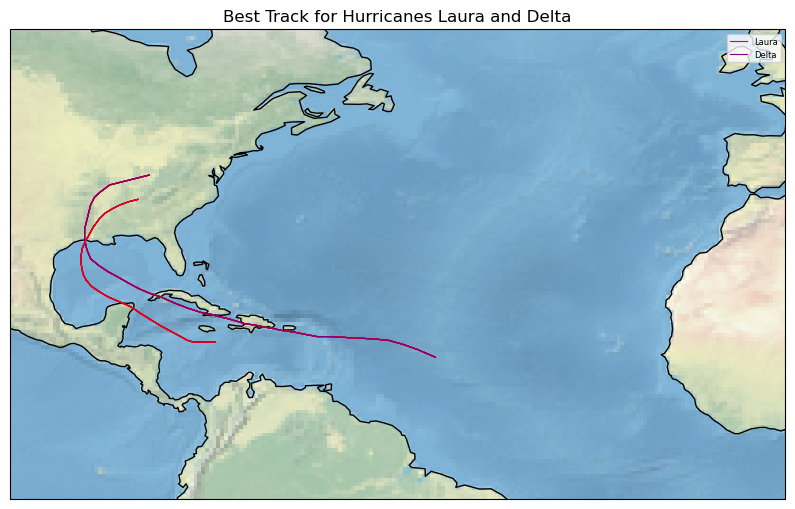

In [23]:
# Inspect tracks for visual confirmation of similarity
# function creates a plot of any storms listed, similar to how the other plots work
te.track_maps([Laura,Delta],title = 'Best Track for Hurricanes Laura and Delta' ,ens=False)

In [24]:
import datetime as dt

# Extract landfall position for Laura
# Landfall on August 27th at roughly 6 UTC
for i in Laura.best_track.forecasts:
    # Use closest time
    if i.time == dt.datetime(2020,8,27,6, 0):
        landfall_laura = (i.lon,i.lat)
        # keep position object to demo great circle
        pos_laura = i

# Extract landfall position for Delta
# Landfall on October 9th at roughly 23 UTC
for i in Delta.best_track.forecasts:
    # Use closest time
    if i.time == dt.datetime(2020,10,10,0,0):
        landfall_delta = (i.lon,i.lat)
        # keep position object to demo great circle
        pos_delta = i

print(f'Laura position at landfall: {landfall_laura}')
print(f'Delta position at landfall: {landfall_delta}')
print(f'Distance between Laura and Delta at landfall: {pos_laura.great_circle(pos_delta)} km')

Laura position at landfall: (-93.3, 29.8)
Delta position at landfall: (-92.9, 30.1)
Distance between Laura and Delta at landfall: 50.97049657621597 km


Given that the NHC estimated that the two storms made landfall roughly 31km apart, and that we have taken the position of the storm at the closest recorded datapoint to landfall, this proves a decent estimate of distance.

### Alternate Track Error Metrics
While great circle distance is very useful and ultimately the official metric for communicating with the public, it is not necessarily the best metric for understanding uncertainty in the model's track error as it is simply a difference in distance. A better assesment of a model forecast would try to provide insight into whether a TC's track error was dominated by an incorrect representation of the storm's latitude (cross-track), over or underestimation of the longitudinal (along-track) propogration of the track (an indicator of the speed of a TC), or a combination of both. Academic verification studies (e.g. Bassill, 2014 and Hazelton et. al., 2022) generally seek to quantify this by considering the 'along-track' and 'cross-track' errors seperately.

##### METHOD:
The following sections of code were created in an attempt to calculate more this precise error data but was ultimately not used: 

The first code block creates a function to solve for the heading, or our z variable, using latitudes and longitudes. Then, track error was calculated for a small sample size of the first 5 time steps of Hurricane Delta using the modeled and actual longitude and latitude values at these time steps as a way to test this process and code. The haversine formula is used again, similar to the process that was actually used for our track error that was used for our data analysis, to find great circle distances in units of kilometers. Then, dx, dy, and dz, values are found by subtracting the predicted locations from the actual locations in each direction. A cross product is then executed to create three vectors which are then normalized and multiplied by dx, dy, and dz, respectively to find the track error. However, this process was resulting in extremely small error values, especially after the vectors had been normalized.



In [25]:
def heading(actual_lat,actual_lon):   
    x = (np.cos(actual_lat[1]))*(np.sin(actual_lon[0]-actual_lon[1]))
    y= (np.cos(actual_lat[0])*np.sin(actual_lat[1]))-((np.sin(actual_lat[1])*np.cos(actual_lat[0])*np.cos(actual_lon[0]-actual_lon[1])))
    B = np.arctan2(x,y)
    return x,y,B

In [26]:
# Generate a test dataset from TC Laura:

lats_1 = Laura.ecmwf.runs[1].return_lats()
#Testing this by just using first five data points so that array sizes are equal
lats_1 = lats_1[0:5]
lons_1 = Laura.ecmwf.runs[1].return_lons()
#Testing this by just using first five data points so that array sizes are equal
lons_1 = lons_1[0:5]

# Print best track longitudes
best_lons = Laura.best_track.return_lons()
best_lons = best_lons[0:5]

best_lats = Laura.best_track.return_lats()
best_lats = best_lats[0:5]
print(lats_1,lons_1,best_lats,best_lons)

[19.0, 31.9, 34.9, 33.2, 19.0] [-65.9, -90.7, -88.9, -89.7, -67.8] [14.4, 15.4, 16.1, 16.6, 16.8] [-47.3, -49.6, -51.6, -53.4, -55.5]


In [27]:
# Sample data (latitude and longitude in degrees)
actual_lats = lats_1
actual_lons = lons_1
predicted_lats = best_lats
predicted_lons = best_lons

actual_lat,actual_lon,actual_heading = heading(actual_lats,actual_lons) 
predicted_lat,predicted_lon,predicted_heading = heading(predicted_lats,predicted_lons) 


# Convert latitude and longitude to Cartesian coordinates (in meters)
R = 6371  # Earth's radius in kilometers
x_actual = R * np.cos((actual_lat)) * np.cos((actual_lon))
y_actual = R * np.cos((actual_lat)) * np.sin((actual_lon))
z_actual = R * np.sin((actual_heading))

x_predicted = R * np.cos((predicted_lat)) * np.cos((predicted_lon))
y_predicted = R * np.cos((predicted_lat)) * np.sin((predicted_lon))
z_predicted = R * np.sin((predicted_heading))


# Calculate difference vector in x, y, z directions
dx = x_actual - x_predicted
dy = y_actual - y_predicted
dz = z_actual - z_predicted
print(dx,dy,dz)

# Calculate cross product vector
cross_x = (y_actual*dz) - (z_actual*dy)
cross_y = (z_actual*dx) - (x_actual*dz)
cross_z = (x_actual*dy) - (y_actual*dx)


# Normalize cross product vector
norm = np.sqrt(cross_x**2 + cross_y**2 + cross_z**2)
cross_x /= norm
cross_y /= norm
cross_z /= norm



# Calculate projection of difference vector onto cross product vector
along_track_error = (dx*cross_x) + (dy*cross_y) + (dz*cross_z)

print(f"dx, dy, dz = {dx}, {dy}, {dz}")
print(f"cross_x, cross_y, cross_z = {cross_x}, {cross_y}, {cross_z}")
print(f"x, y, z terms = {dx*cross_x} + {dy*cross_y} + {dz*cross_z}")

print(f"Along-track error: {along_track_error:} kilometers")

1317.231569166357 785.9779397666425 -81.79185197154402
dx, dy, dz = 1317.231569166357, 785.9779397666425, -81.79185197154402
cross_x, cross_y, cross_z = 0.4795390814220718, -0.757582241870686, 0.442844686307808
x, y, z terms = 631.6640166981891 + -595.4429296693161 + -36.22108702887308
Along-track error: -2.1316282072803006e-14 kilometers


We later determined that these values were accurate for the process that we were implementing in the code, but were representative of values that were not significant to us in what we wanted to analyze. Essentially, we were multiplying a vector by an extremely small vector and a sine theta, resulting in these infinitesimally small error values. Rather, we should have done something different. A vector should have been constructed between the actual data points and a vector should have been constructed between the predicted data points, all in reference to an origin point at the center of the Earth. The cross product of these two vectors would produce values that are more reflective of the accuracy of the model as they directly relate the locations of the vectors between the actual and predicted locations rather than working with individual points on the Earth's surface. We ultimately decided to not implement our modified along track error code because we were running low on time and the National Hurricane Center uses the method that we had already implemented.

# ANALYSIS
Nick / Claire

For increased efficiency, we decided to write 2 functions, "fftTrackErrorPlot" and "fftIntensityErrorPlot", to analyze and better format the track and intensity error data. 

#### Formatting and Chronological Ordering
First, we defined the set of model run forecasts for each cyclone as "Output" and iterated through it to access all of the intialization times and track errors for each tropical cyclone. We merged these separate lists of times and track errors, "RawT" and "RawTE", into a more condensed list of tuples, "TTE", that could then be sorted in chronological order using Python's "sorted" function. 

Once these are chronologically ordered, the function iterates through each tuple in the sorted list, "SortedTTE", appending each corresponding time and track error item into new lists. The lists are converted into arrays, which allows to finally plot time and track error against each other and perform our analysis techniques.

#### Polynomial Fits
The resulting error plots in the first sublot generally have an increasing trend over time, so in an attempt to detrend and increase stationarity, we applied secondary polynomial fits to each curve and subtracted these from the actual errors to yield track errors centered around 0 kilometers. These are shown in the second and third subplots in the figure. These fits allow us to see the smaller scale trends in error better without clutter from the long term trend. 

After applying first through fourth degree polynomial fits, we decided that the second degree fits detrended the data best and matched the shapes of the actual error curves pretty well. Fits of higher degrees can become too sensitive to small fluctuations in the data, but any degree from 2 to 4 applied on these error curves produce fairly similar detrended data.

There is a set of if and else statements involved in our functions because one of EPS runs for Cristobal was so short that the polyfit function did not have enough points to create a second degree polynomial fit from it. A linear fit was applied to this one run instead, and because it was so short, the difference between a first and second degree fit is negligible. It is essentially like making a linear approximation for a small window along a higher order function: they are usually good approximations when the window is apropriately small.

#### Fourier Transforms
Finally, we applied Fourier transforms to the newly detrended error to see if there are any persistent oscillations in the track errors. We also found the frequency spectrum for each EPS model run of the cyclones and plotted the amplitudes from the Fourier transform against their corresponding frequencies. We used a timestep (dt) of 1/4 to get frequencies in cycles/day because the model initializes every 6 hours, meaning 4 initialization times per day. The transforms are plotted in the fourth subplot in the figure.

#### Other Notable Information
The "fftIntensityErrorPlot" function farther down works the exact same way as fftTrackErrorPlot but uses the intensity errors instead of track errors.

The "merge" function immediately below was used to combine the separate lists of times and errors into a new list of tuples in both the fftTrackErrorPlot and fftIntensityErrorPlot functions. The "colorFader" function was used to create a pleasing and distinguishable gradient of colors for all of our plotted lines, and each color corresponds to each model run initialization time for each storm.

In [28]:
#Import the needed Python libraries for our analysis.
import matplotlib as mpl
import datetime as dt
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
from scipy.ndimage import uniform_filter1d

#This function is used because of how the data was stored and is implemented into both of our plotting functions below.
def merge(list1, list2):
    '''Arguments:
    list1, list2: Two lists of data to combine into a list of tuples.
    
    This function zips two separate lists into a condensed list of tuples to be sorted later on'''
    merged_list = tuple(zip(list1, list2))
    return merged_list

#This function is used to create a pleasing and distinguishable gradient of colors for all of our plotted lines. 
def colorFader(c1,c2,mix=0):
    '''Arguments:
    c1, c2: Two colors that we would like to create a gradient of colors out of.
    
    mix: A number that tells the function how to combine each color.
    
    This function fades two matplotlib colors together to create a gradient.'''  
    c1=np.array(mpl.colors.to_rgb(c1))
    c2=np.array(mpl.colors.to_rgb(c2))
    return mpl.colors.to_hex((1-mix)*c1 + mix*c2)

In [29]:
def fftTrackErrorPlot(RunNumber, ax1, ax2, ax3, ax4, mix, cyclone):
    
    '''Arguments:
    RunNumber: A range of numbers corresponding to the number of EPS model runs per cyclone.
    
    ax1, ax2, ax3, ax4: A set of axes for each subplot in the figure that will be generated.
    
    mix: a range of numbers corresponding to RunNumber that inherently tells the colorFader function 
    how to combine the colors we select for our plots. Each number creates a slightly different color
    and yields a gradient of colors, one for each model run.
    
    This function creates a figure with 4 subplots for actual track error against time, 
    second degree polynomial fits of the track error against lead time from model initialization, 
    detrended track error data by subtracting the polynomial fits from the actual errors,and fast 
    Fourier transforms of the track error data for each model run.'''

    #All the model output variables come in a big list of tuples. They are not ordered in any specific way.
    Output = cyclone.ecmwf.runs[RunNumber].forecasts

    #Get the model run initialization times and respective track errors out of the large list of tuples.
    RawT = [cyclone.ecmwf.runs[RunNumber].forecasts[idx].time for (idx, fcst) in enumerate(Output)]
    RawTE = [cyclone.ecmwf.runs[RunNumber].forecasts[idx].track_error for (idx, fcst) in enumerate(Output)]
    
    #Create a separate list of tuples with the initialization times and track errors.
    TTE = merge(RawT, RawTE)
    
    #Sort the tuples in chronological order to plot them correctly for our analysis.
    SortedTTE = sorted(TTE, key = lambda x: x[0])
    
    #Create empty lists to append the times and track errors into from the list of tuples.
    TimeList = []
    TrackErrorList = []
    for i in SortedTTE:
        TimeList.append(i[0])
        TrackErrorList.append(i[1])
    
    #Convert the new intiailization time and track error lists into arrays.
    Time = np.array(TimeList)
    TrackError = np.array(TrackErrorList)
    
    #Create a range of times in a non-datetime format and calculate the polynomial coeffieicents so polyfit can work.
    PolyfitTime = np.arange(0,len(Time)*6,6)
    if len(Time) <= 3:
        coeffs = np.polyfit(PolyfitTime, TrackError, 1)
    else:
        coeffs = np.polyfit(PolyfitTime, TrackError, 2)

    #Create the polynomial fit.
    Trendline = np.polyval(coeffs, PolyfitTime)

    dt = 1/4 #Units of fraction of a day for fftfreq.
    N = Time.size #Length of time series.
    
    #Detrend the data buy subtracting the trendlines from track errors and take the Fourier transform of that. 
    TrackErrorfft = fft(TrackError - Trendline)

    #Get the frequencies in cycles/day.
    Freqs = fftfreq(N, dt)
    
    #Get the needed amplitudes by indexing into the positive values of the Fourier Transform and normalizing them.
    TrackErrorAmps = 1/N * np.abs(TrackErrorfft[1:N//2])
    
    #For the labels of each subplot so we can compare each model run based on initialization time.
    InitTime = TimeList[0]

    #First set of axes for track error vs. time on first subplot.
    ax1.plot(Time, TrackError, c = colorFader('red', 'blue', mix))
    ax1.set_xlabel('Time')
    ax1.set_ylabel('Track Error (km)')
    ax1.set_title('Track Error for each EPS Mean Run')
    
    #Second set of axes for the polynomial fits vs. time.
    ax2.plot(PolyfitTime, Trendline, c = colorFader('red', 'blue', mix))
    ax2.set_xlabel('Lead Time (hours) from Model Initialization')
    ax2.set_ylabel('Track Error (km)')
    ax2.set_title('Second Degree Polynomial Fits for each EPS Mean Run')
    
    #Third set of axes for the detrended track error data.
    ax3.plot(Time, TrackError - Trendline, c = colorFader('red', 'blue', mix))
    ax3.set_xlabel('Time')
    ax3.set_ylabel('Detrended Track Error (km)')
    ax3.set_title('Detrended Track Error Data for each EPS Mean Run')
    
    #Fourth set of axes for the fourier transforms and frequencies.
    ax4.plot(Freqs[1:N//2], TrackErrorAmps, c = colorFader('red', 'blue', mix))
    ax4.set_xlabel('Frequency (cycles/day)')
    ax4.set_ylabel('Amplitude (km)')
    ax4.set_title('Frequency Spectra for Detrended Track Errors of each EPS Mean Run')
    
    return InitTime     


In [30]:
def fftIntensityErrorPlot(RunNumber, ax5, ax6, ax7, ax8, cf,cyclone):
    '''Arguments:
    RunNumber: A range of numbers corresponding to the number of EPS model runs per cyclone.
    
    ax5, ax6, ax7, ax8: A set of axes for each subplot in the figure that will be generated.
    
    mix: a range of numbers corresponding to RunNumber that inherently tells the colorFader function 
    how to combine the colors we select for our plots. Each number creates a slightly different color
    and yields a gradient of colors, one for each model run.
    
    This function creates a figure with 4 subplots for actual intensity error against time, 
    second degree polynomial fits of the intensity error against lead time from model initialization, 
    detrended intensity error data by subtracting the polynomial fits from the actual errors, and fast 
    Fourier transforms of the intensity error data for each model run.'''

    #All the model output variables in a big list of tuples.
    Output = cyclone.ecmwf.runs[RunNumber].forecasts

    #Get the times and intensity errors out of the list.
    RawT = [cyclone.ecmwf.runs[RunNumber].forecasts[idx].time for (idx, fcst) in enumerate(Output)]
    RawIE = [cyclone.ecmwf.runs[RunNumber].forecasts[idx].intensity_error for (idx, fcst) in enumerate(Output)]
    
    #Create a list of tuples with the times and intensity errors.
    TIE = merge(RawT, RawIE)
    
    #Sort the tuples in chronological order to plot them correctly.
    SortedTIE = sorted(TIE, key = lambda x: x[0])
    
    #Empty lists to append the times and intensity errors into from the list of tuples.
    TimeList = []
    IntensityErrorList = []
    for i in SortedTIE:
        TimeList.append(i[0])
        IntensityErrorList.append(i[1])
    
    #Convert the new lists into arrays.
    Time = np.array(TimeList)
    IntensityError = np.array(IntensityErrorList)
    
    #Create a range of times in a non-datetime format and calculate the polynomial coeffieicents so polyfit can work.
    PolyfitTime = np.arange(0,len(Time)*6,6)
    if len(Time) <= 3:
        coeffs = np.polyfit(PolyfitTime, IntensityError, 1)
    else:
        coeffs = np.polyfit(PolyfitTime, IntensityError, 2)

    #Create the polynomial fit.
    Trendline = np.polyval(coeffs, PolyfitTime)

    dt = 1/4 #Units of fraction of a day for fftfreq.
    N = Time.size #Length of time series.
    
    #Detrend the data buy subtracting the trendlines from actual intensity errors and take the Fourier transform of that. 
    IntensityErrorfft = fft(IntensityError - Trendline)

    #Get the frequencies in cycles/year.
    Freqs = fftfreq(N, dt)
    
    #Get the needed amplitudes by indexing into the positive values of the Fourier Transform and normalizing them.
    IntensityErrorAmps = 1/N * np.abs(IntensityErrorfft[1:N//2])
    
    #For the labels of each subplot so we can compare each model run based on initialization time.
    InitTime = TimeList[0]

    #First set of axes for intensity error vs. time on first subplot.
    ax5.plot(Time, IntensityError, c = colorFader('red', 'blue', cf))
    ax5.set_xlabel('Time')
    ax5.set_ylabel('Intensity Error (mbar)')
    ax5.set_title('Intensity Error for each EPS Mean Run')
    
    #Second set of axes for the polynomial fits vs. time.
    ax6.plot(PolyfitTime, Trendline, c = colorFader('red', 'blue', cf))
    ax6.set_xlabel('Lead Time (hours) from Model Initialization')
    ax6.set_ylabel('Intensity Error (mbar)')
    ax6.set_title('Second Degree Polynomial Fits for each EPS Mean Run')
    
    #Third set of axes for the detrended intensity error data.
    ax7.plot(Time, IntensityError - Trendline, c = colorFader('red', 'blue', cf))
    ax7.set_xlabel('Time')
    ax7.set_ylabel('Detrended Intensity Error (mbar)')
    ax7.set_title('Detrended Intensity Error Data for each EPS Mean Run')
    
    #Fourth set of axes for the fourier transforms and frequencies.
    ax8.plot(Freqs[1:N//2], IntensityErrorAmps, c = colorFader('red', 'blue', cf))
    ax8.set_xlabel('Frequency (cycles/day)')
    ax8.set_ylabel('Amplitude (mbar)')
    ax8.set_title('Frequency Spectra for Detrended Intensity Error of each EPS Mean Run')
    
    return InitTime     



In [31]:
def plot_ffts(cyclone,type):
    #Create the figure for the subplots and set positions for the axes.
    fig1 = plt.figure(figsize=(10,20))
    fig1.set_constrained_layout(True)
    ax1 = fig1.add_subplot(411)
    ax2 = fig1.add_subplot(412)
    ax3 = fig1.add_subplot(413)
    ax4 = fig1.add_subplot(414)
    #Create an array of model run numbers to iterate through each and plot them. Must change for each storm.
    RunNumber = range(len(cyclone.ecmwf.runs))

    #Create and empty list to append the labels into.
    TrackErrorlabels = []

    #Iterate through each run number to produce a label for each model run initialization time.
    #This iteration also applies a different color in the gradient to each label.
    for i in RunNumber:
        mix = i/len(RunNumber)
        if type == 'TE':
            labels = fftTrackErrorPlot(i, ax1, ax2, ax3, ax4, mix, cyclone)
        if type == 'IE':
            labels = fftIntensityErrorPlot(i, ax1, ax2, ax3, ax4, mix, cyclone)
        TrackErrorlabels.append(labels)
        
    #Add the labels to each subplot.
    ax1.legend(TrackErrorlabels, loc = "upper left", fontsize = 8)
    ax2.legend(TrackErrorlabels, loc = "upper left", fontsize = 8)
    ax3.legend(TrackErrorlabels, loc = "upper left", fontsize = 8)
    ax4.legend(TrackErrorlabels, loc = "upper right", fontsize = 8)
    fig1.suptitle(f'Fourier Transform Statistics for TC {cyclone.name}')



## Results

For all of the cyclones, we can see that, generally, track error increases with time. Even looking at the raw data, we can see that there are some oscillations in the rate of increase of track error, as the track error for EPS runs that initialize early in the cyclone's lifetime tend to flatten out, or even decrease, towards the middle of the time window, and then increase again later on. When we detrend the track error with the polynomial fits, the oscillations are displayed even better in many of the early EPS runs.

## Cristobal

We start by generating FFT plots for Cristobal:

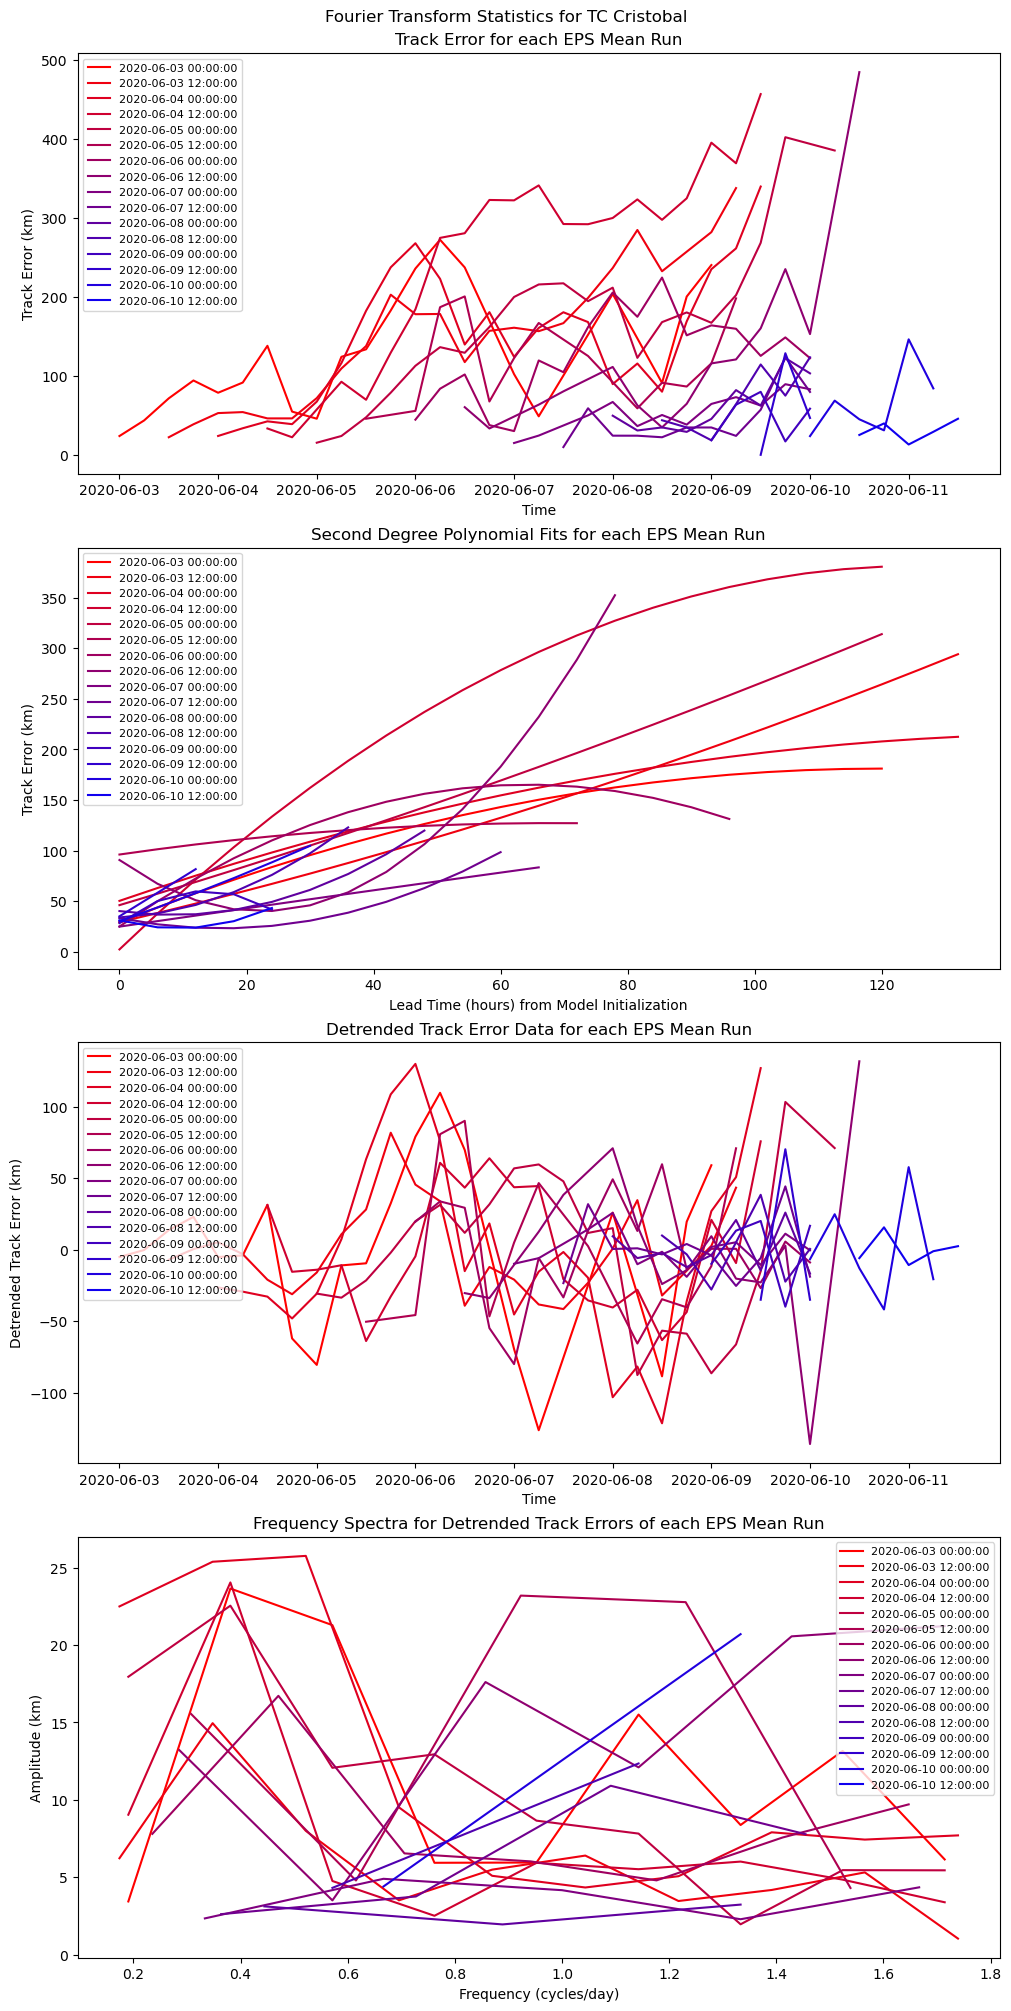

In [32]:
plot_ffts(Cristobal,'TE')

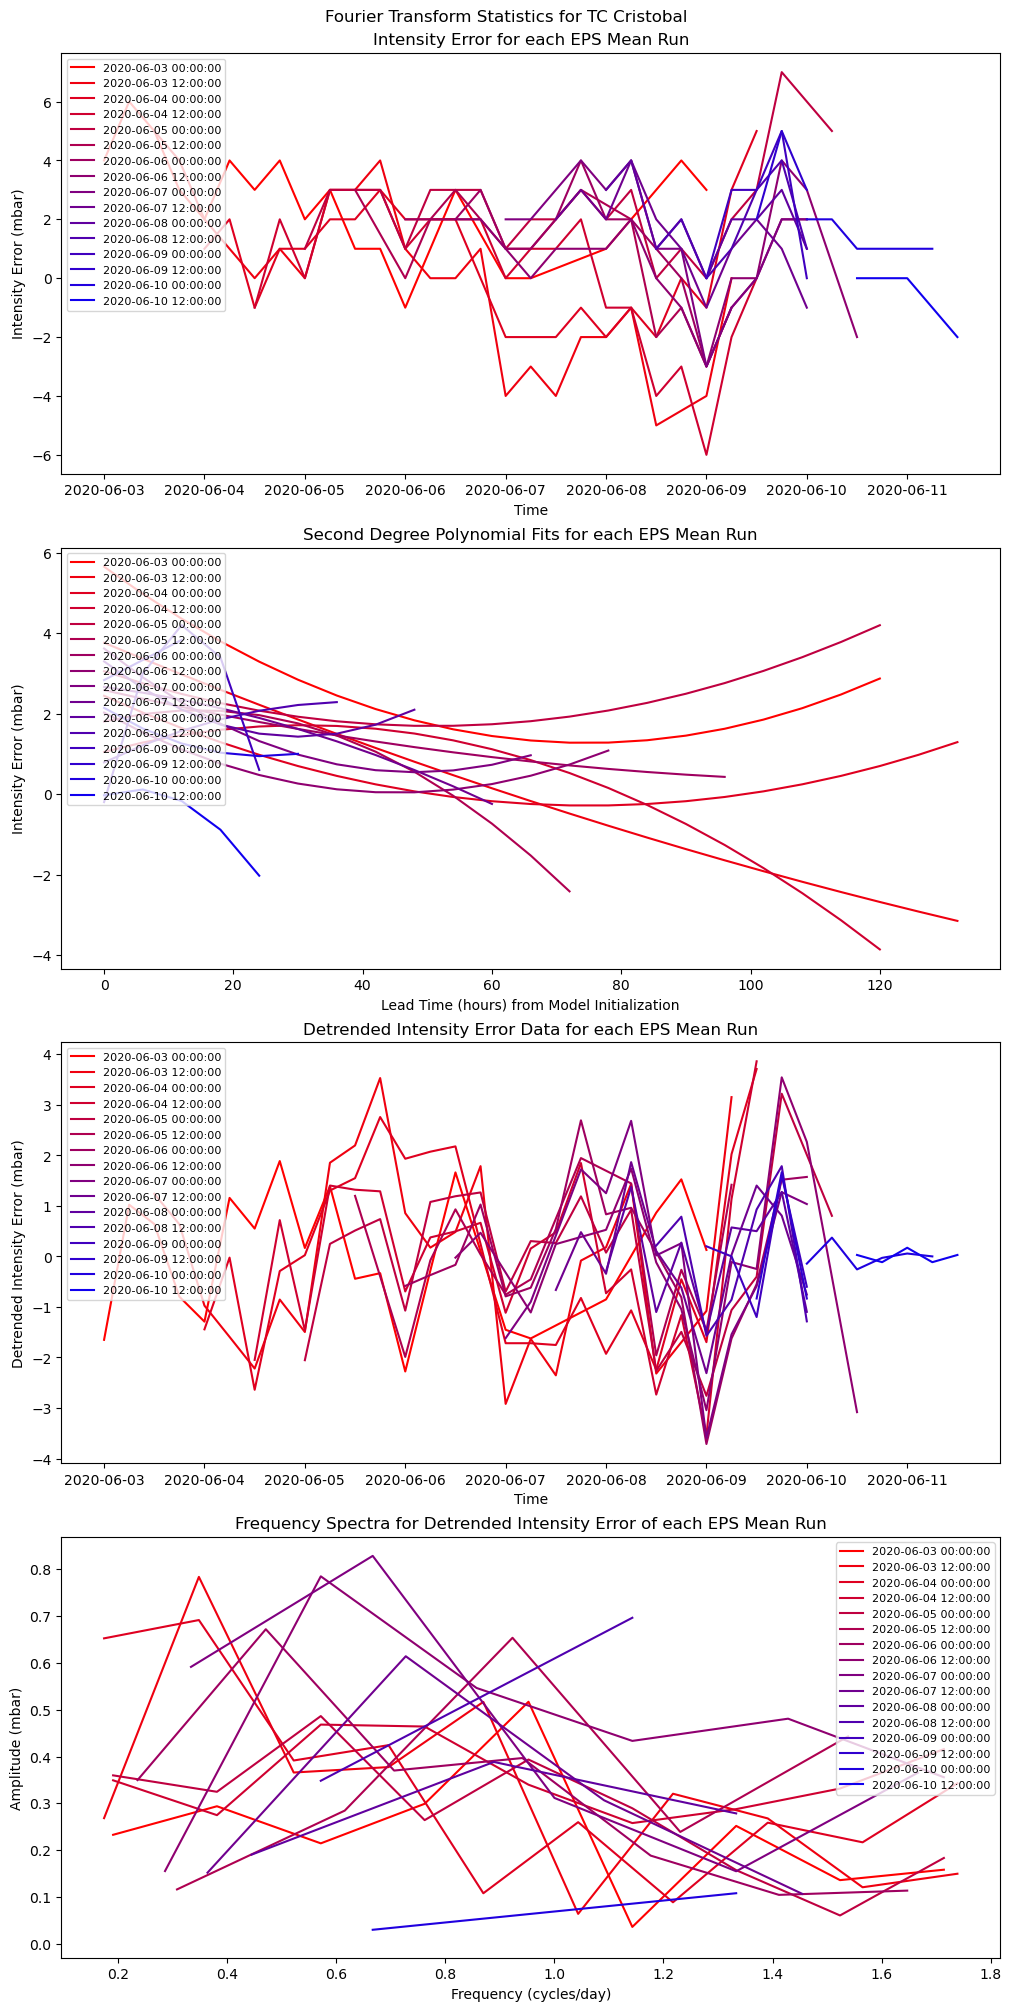

In [33]:
plot_ffts(Cristobal,'IE')

Cristobal has the most pronounced dominant frequency signal in the track error of several EPS runs around 0.4 cycles/day, although there are some higher frequencies that also have a significant contribution. Some of these same runs also have a dominant frequency in intensity error oscillations around 0.4 cycles/day, but it's more spread out and less pronounced around a single frequency.

### Delta

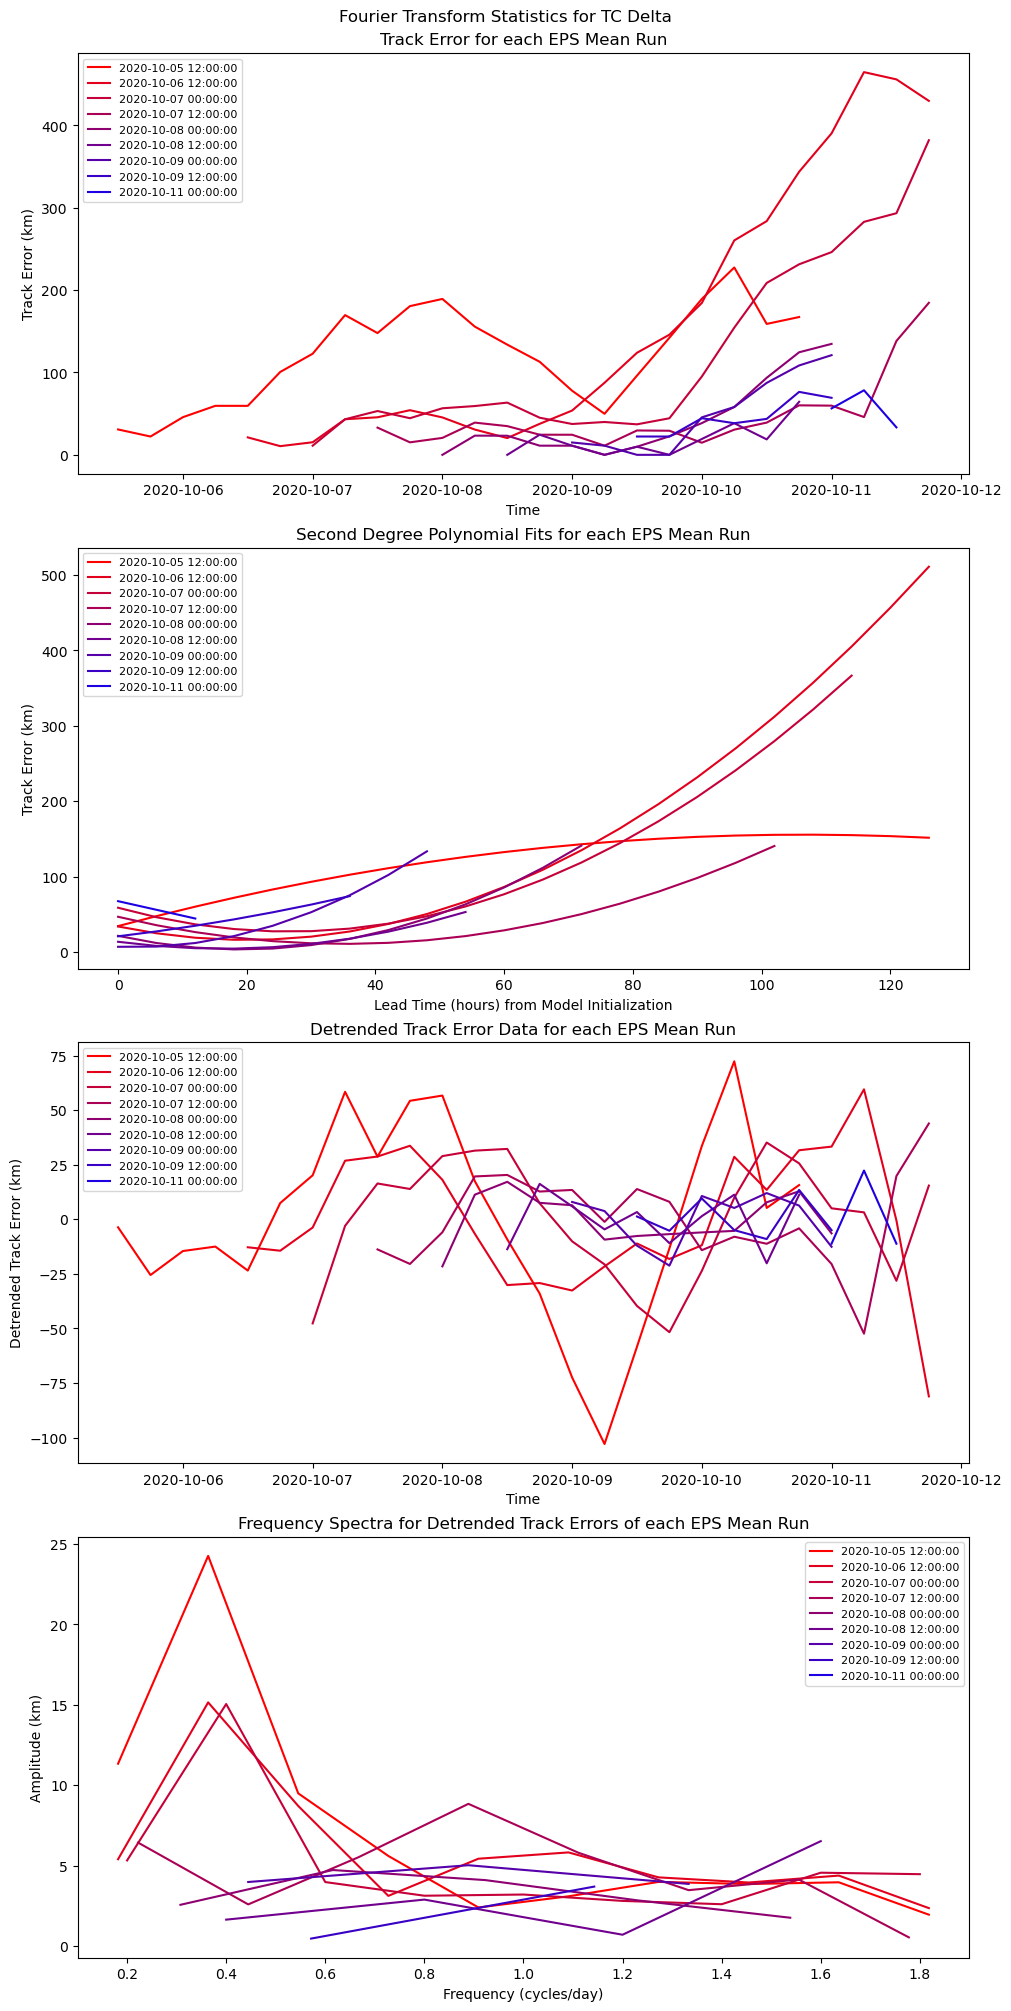

In [34]:
plot_ffts(Delta,'TE')

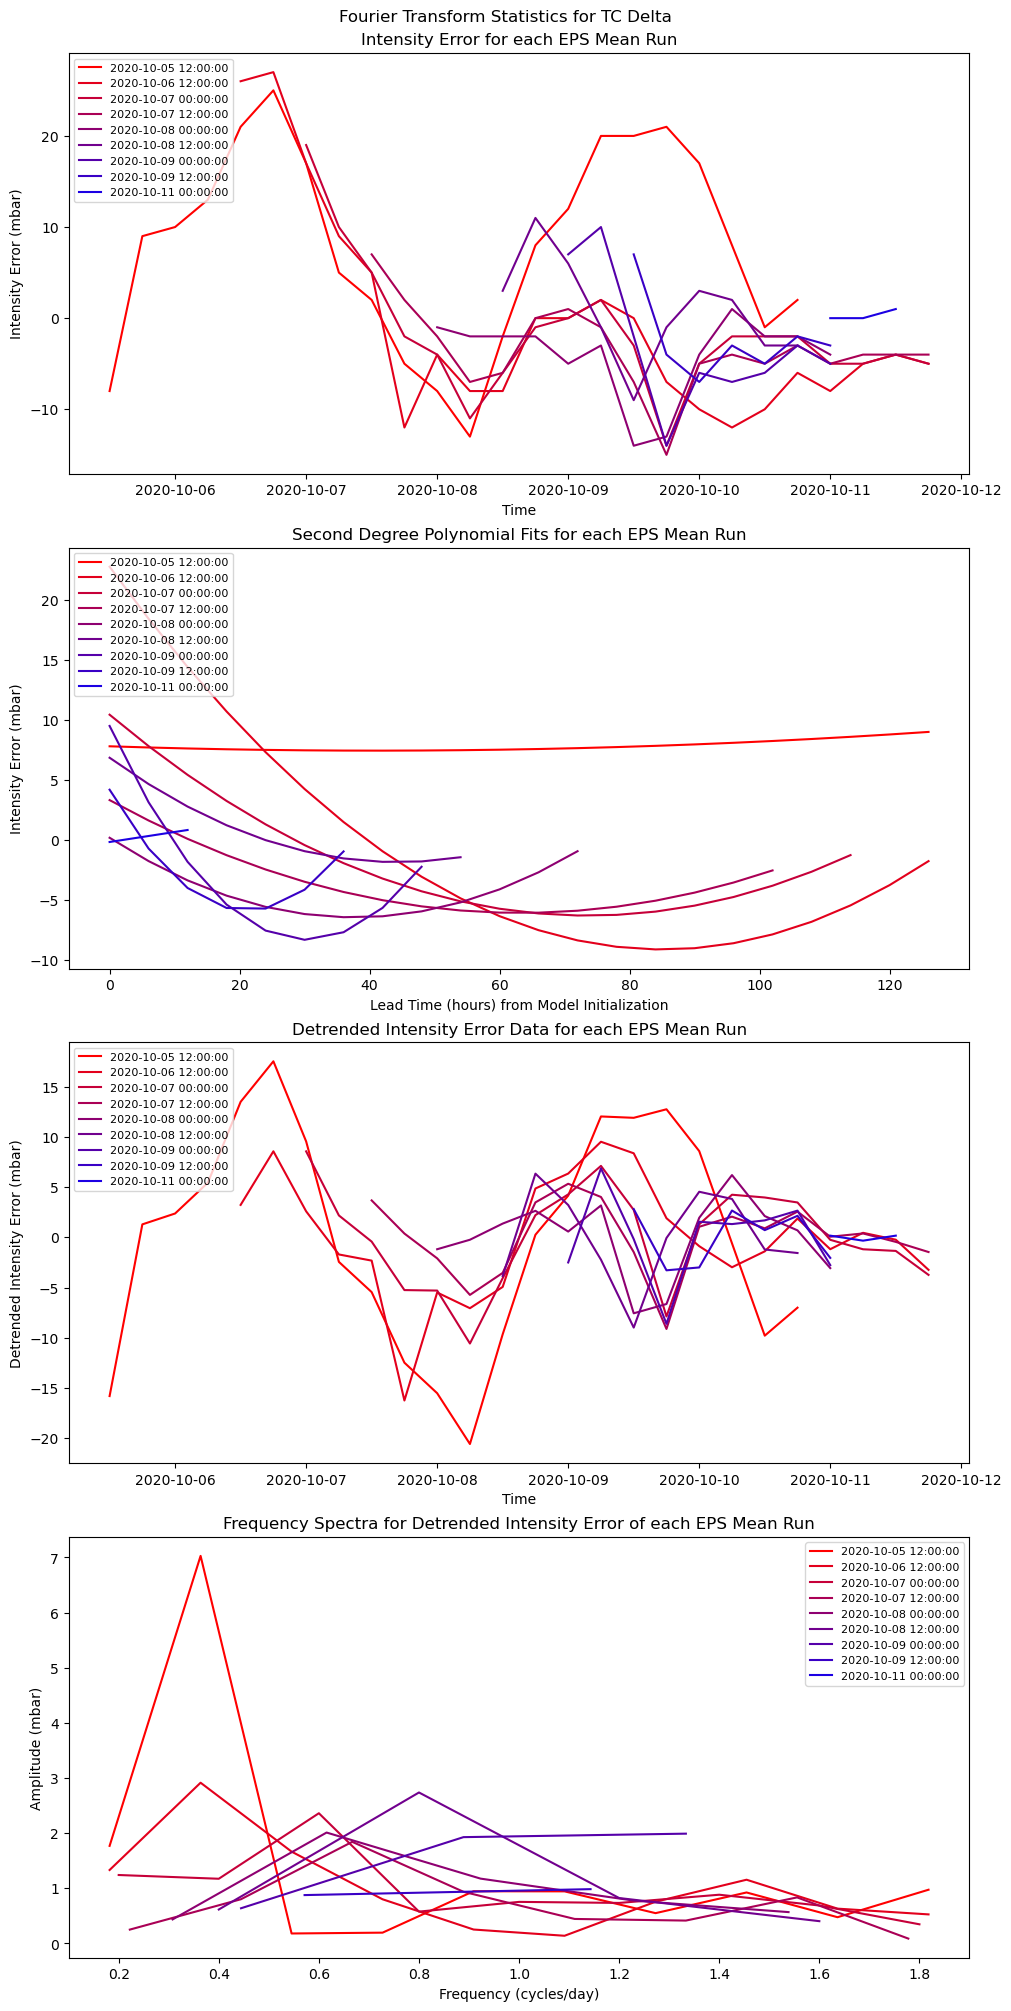

In [35]:
plot_ffts(Delta,'IE')

Delta has a similar percentage of EPS runs with a dominant frequency in track error oscillation around 0.4 cycles/day, considering that Delta only had 9 EPS runs, and Cristobal had 16. These frequencies are even more closely centered around 0.4 cycles/day with less noise at higher frequencies. One of the runs has a nearly matched frequency spectrum for both the track and intensity error, but, overall, the dominant frequency in the intensity errors for most of the EPS runs is less pronounced and at higher frequencies.

### Laura

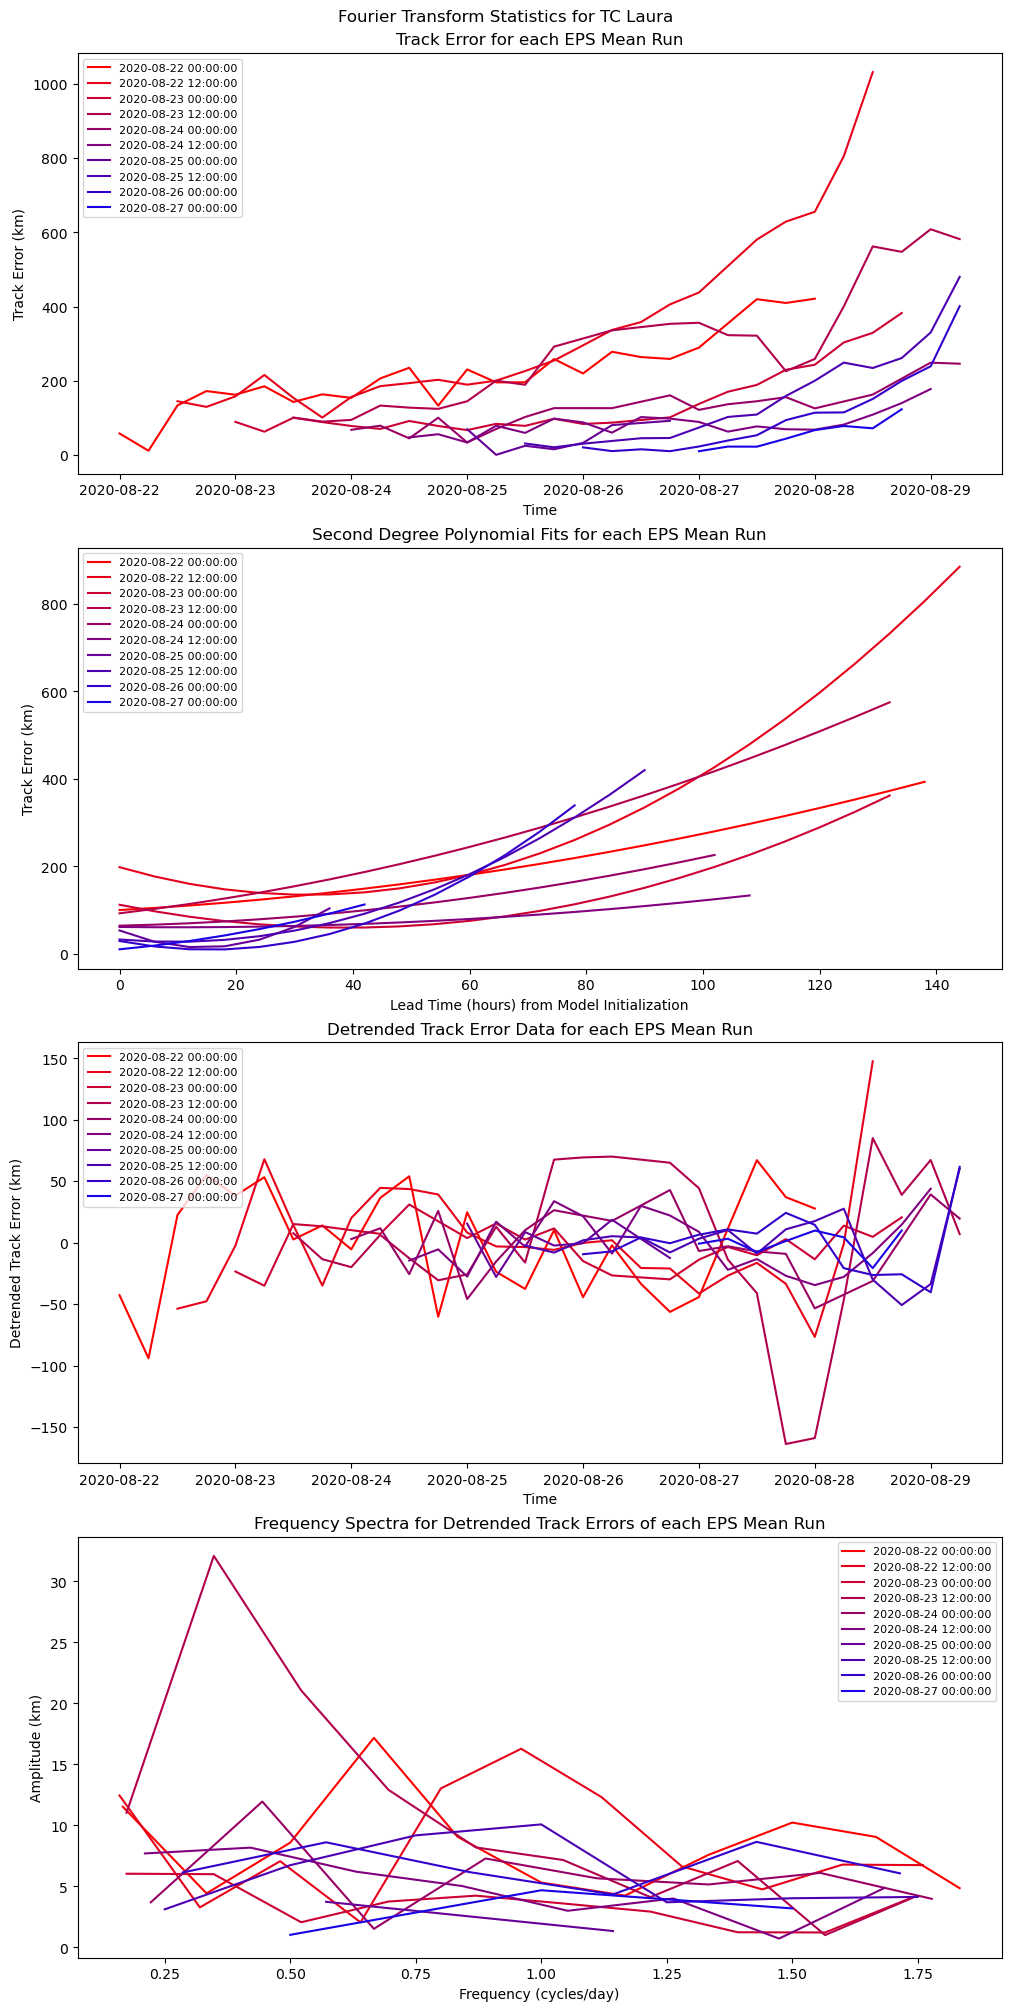

In [36]:
plot_ffts(Laura,'TE')

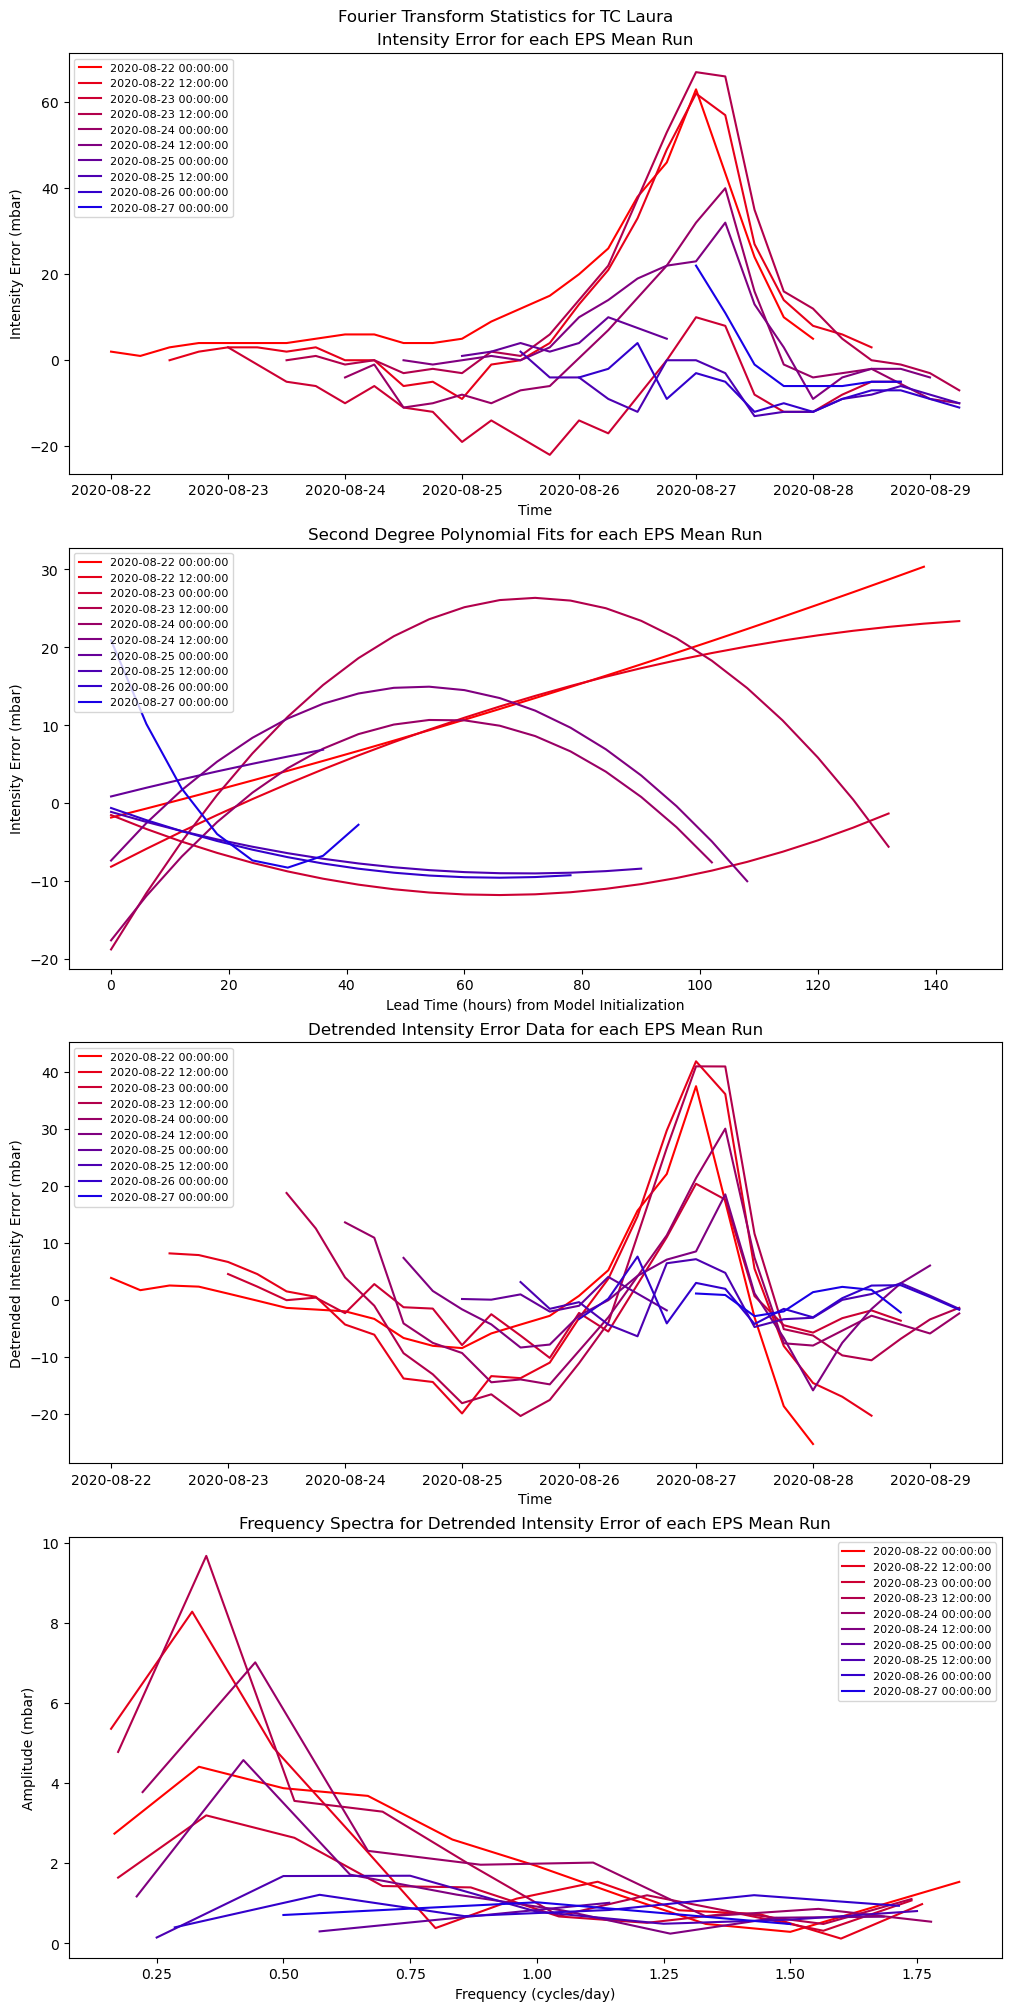

In [37]:
plot_ffts(Laura,'IE')

The dominant frequencies in track error for Laura's EPS runs are less clear than Delta's, and only one of the runs has a significant amplitude around 0.4 cycles/day. Interestingly, there is a greater dominant frequency signal in Laura's intensity errors around 0.4 cycles/day, opposite of Delta.

#### Extratropical Transition
For Cristobal specifically, there is a clear trend in the EPS runs towards the end of the cyclone's life to have improved track errors as the storm nears and undergoes its extratropical transition. An extratropical transition occurs when a tropical cyclone becomes dominated by mid-latitude dynamics when it exits the subtropics and resembles a cyclone that we would see here in Michigan.

Because a large fraction of Cristobal's life was spent moving north through the U.S. and eventually into Canada, it makes sense that the EPS would handle the storm better. These kinds of models tend to do better with midlatitude cyclones because of the equations that have been programmed into them, and some dynamics that we experience here in the midlatitudes can break down in the tropics, as the coriolis force is not as strong. 

Delta and Laura spent the vast majority of their lifetime in the (sub)tropics, and significant improvement in track error in EPS runs initializating towards the end of their lives is not as clear. This matches up with what we understand about the models, and further analysis could explore more storms to see if these findings hold.

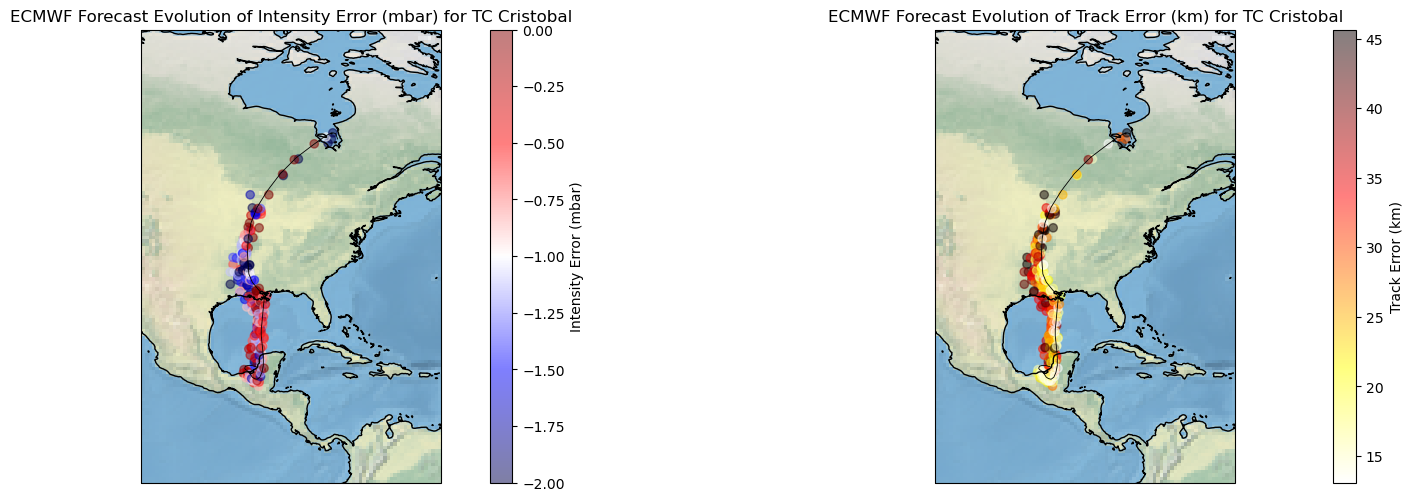

In [38]:
Cristobal.track_map_fcast_evolution_errors()

Should go with Claire's comparison here:

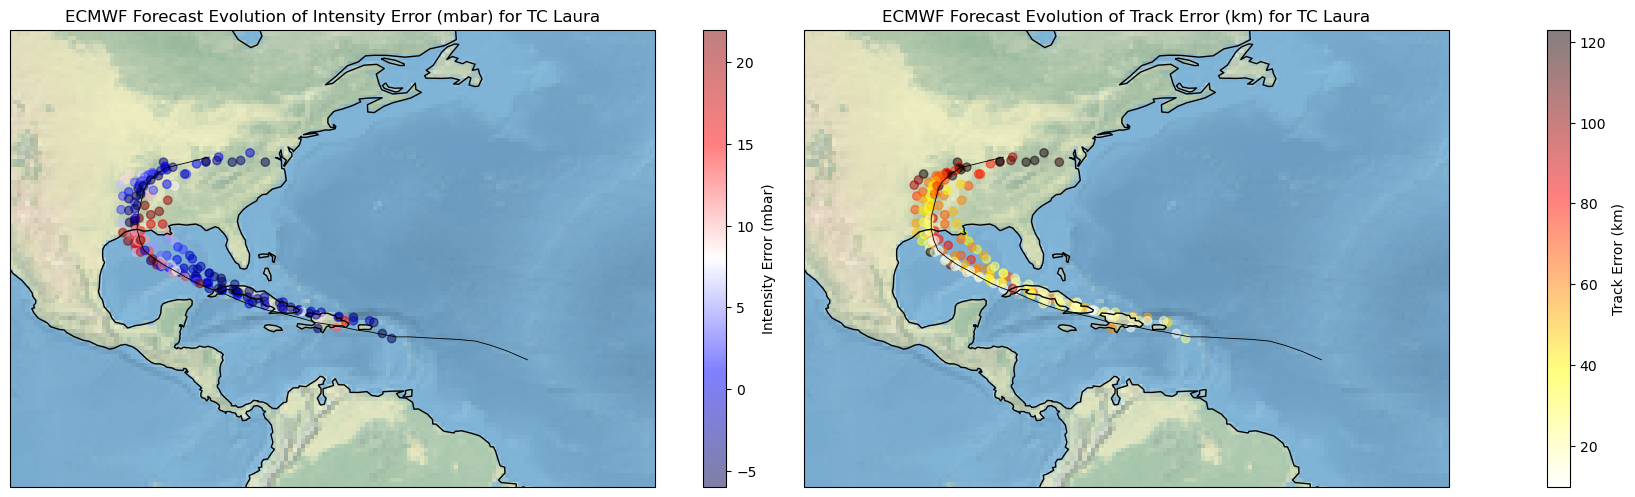

In [39]:
Laura.track_map_fcast_evolution_errors()

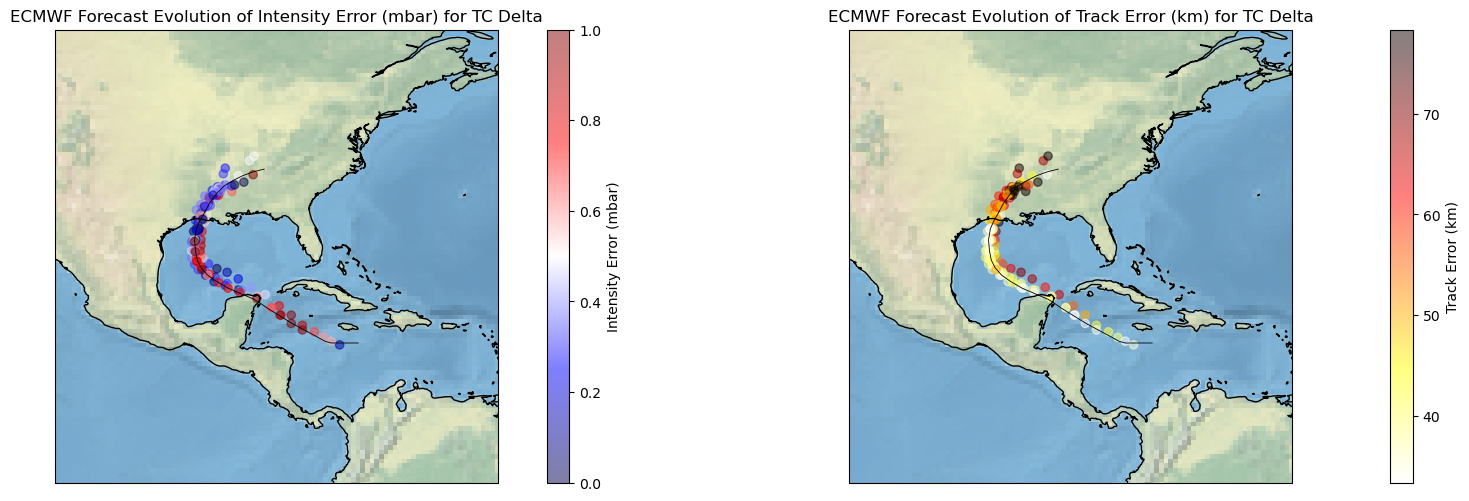

In [40]:
Delta.track_map_fcast_evolution_errors()

#### Discussion

Lara (will fill out when FFTs are in the file)

In [41]:
def get_TCs(dir):
    """ Sort and list all directories containing TC tracks
    
    Lists all directories containing TC tracks in a specified path.
    Ignores all hidden directories and other files.


    Parameters
    -----------
    dir : string
        Path to directory containing TC track directories

    Returns
    --------
        : List
        List of directories containing TC tracks
    """
    return sorted((f for f in os.listdir(dir) if not f.startswith(".")), key=str.lower)

In [42]:
# Read in all cyclones for the season
dirpath = "/Users/laratobias-tarsh/Documents/clim323-final/tcTracksCleaned/"
storms = get_TCs(dirpath)

# Store storms for all season in list
storm_list = []
for storm in storms:
    # Initialise Cyclone objects for all storms in season
    storm_list.append(te.generate_cyclone(dirpath+storm))

reading file: Arthur-2020-05-17-12.csv
reading file: Arthur-2020-05-18-00.csv
reading file: Arthur-2020-05-18-12.csv
reading file: Arthur-2020-05-19-00.csv
reading file: Arthur-2020-05-19-12.csv
reading file: Arthur-2020-05-20-00.csv
reading file: Beta-2020-09-19-00.csv
reading file: Beta-2020-09-19-12.csv
reading file: Beta-2020-09-20-00.csv
reading file: Beta-2020-09-22-00.csv
reading file: Beta-2020-09-22-12.csv
reading file: Beta-2020-09-23-00.csv
reading file: Beta-2020-09-23-12.csv
reading file: Beta-2020-09-24-00.csv
reading file: Beta-2020-09-24-12.csv
reading file: Cristobal-2020-06-03-00.csv
reading file: Cristobal-2020-06-03-12.csv
reading file: Cristobal-2020-06-04-00.csv
reading file: Cristobal-2020-06-04-12.csv
reading file: Cristobal-2020-06-05-00.csv
reading file: Cristobal-2020-06-05-12.csv
reading file: Cristobal-2020-06-06-00.csv
reading file: Cristobal-2020-06-06-12.csv
reading file: Cristobal-2020-06-07-00.csv
reading file: Cristobal-2020-06-07-12.csv
reading file:

In [270]:
import scipy.stats
def te_ie_corr(cyclones):
    """
    Parameters
    -----------
    cyclones : List(Cyclone)
        List of cyclones for a given season

    Returns
    --------
    corr_coeff : int
        Pearson's correlation between TE and IE for season
    """
    fig = plt.figure(figsize=(12,5))
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)
    colors = [colorFader('red','blue',i/len(cyclones)) for i in range(len(cyclones))]
    ax1.set_prop_cycle(color=colors)

    # Loop through cyclones for season and store TE and IE for each storm in list of tuples
    names = []
    all_ies = []
    all_tes = []
    ccs = []
    pvals = []
    for cyclone in cyclones:
        ies = []
        tes = []
        for run in cyclone.ecmwf.runs:
            intensityError = run.return_error_pair()[0][:]
            trackError = run.return_error_pair()[1][:]
            #print(trackError, intensityError)
            
            ax1.scatter(intensityError,trackError)
            ax1.set_xlabel('Intensity Error (hPa)')
            ax1.set_ylabel('Track Error (km)')

           # print(run.return_error_pair())
            
            error_pairs = (run.return_error_pair())
            for i in error_pairs:
                ies.append(i[0])
                tes.append(i[1])
                all_ies.append(i[0])
                all_tes.append(i[1])

        cc,pval = scipy.stats.pearsonr(ies,tes)
        ccs.append(cc)
        pvals.append(pval)
        names.append(f'{cyclone.name}, correlation coeff = {np.round(cc,3)}, p value = {np.round(pval,3)}')
        #print(f'Name: {cyclone.name} \n corr: {cc} \n pval: {pval}')
    
        ax1.legend(names,prop={'size':6})
    counts, bins = np.histogram(ccs)
    ax2.stairs(counts, bins)
    #ax2.cohere(all_ies,all_tes)
    
    # calculate correlation coefficient...


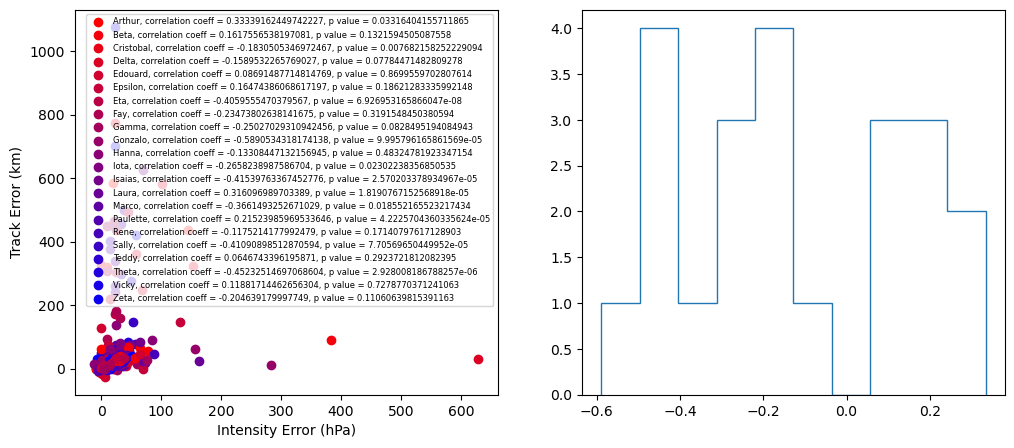

In [271]:
te_ie_corr(storm_list)